In [1]:
import numpy as np
from qiskit.primitives.backend_estimator import _pauli_expval_with_variance
from qiskit.primitives import Sampler, Estimator
from qiskit.quantum_info import SparsePauliOp

from squlearn.util.optree.optree_evaluate import evaluate_expectation_from_sampler

In [2]:
operator = SparsePauliOp(["ZZ", "IZ", "ZI", "II"], coeffs=[0.5, 0.4, 0.3, 0.2])
print(operator)

SparsePauliOp(['ZZ', 'IZ', 'ZI', 'II'],
              coeffs=[0.5+0.j, 0.4+0.j, 0.3+0.j, 0.2+0.j])


In [3]:
op2 = operator.power(2)
print(op2)

SparsePauliOp(['II', 'ZI', 'IZ', 'ZZ', 'ZI', 'II', 'ZZ', 'IZ', 'IZ', 'ZZ', 'II', 'ZI', 'ZZ', 'IZ', 'ZI', 'II'],
              coeffs=[0.25+0.j, 0.2 +0.j, 0.15+0.j, 0.1 +0.j, 0.2 +0.j, 0.16+0.j, 0.12+0.j,
 0.08+0.j, 0.15+0.j, 0.12+0.j, 0.09+0.j, 0.06+0.j, 0.1 +0.j, 0.08+0.j,
 0.06+0.j, 0.04+0.j])


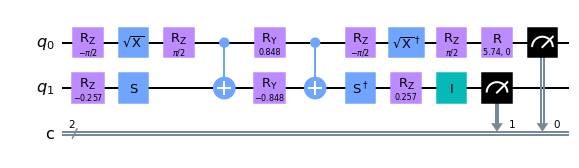

In [4]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0, measure=True).decompose(reps=1)
circuit2 = random_circuit(2, 2, seed=1, measure=True).decompose(reps=1)
display(circuit.draw("mpl"))

In [5]:
job = Sampler().run(circuits=[circuit, circuit2])

In [6]:
exp = (
    Estimator()
    .run(
        [
            circuit.remove_final_measurements(inplace=False),
            circuit2.remove_final_measurements(inplace=False),
        ],
        [operator, operator],
    )
    .result()
    .values
)
print("exp", exp)

exp [0.54720425 1.4       ]


In [7]:
exp2 = Estimator().run(circuit.remove_final_measurements(inplace=False), op2).result().values[0]
variance = exp2 - exp**2
print("Variance: ", variance, np.sqrt(variance))

Variance:  [ 0.50293223 -1.15763528] [0.70917715        nan]


C:\Users\DKR\AppData\Local\Temp\ipykernel_22900\286784944.py:3: RuntimeWarning: invalid value encountered in sqrt
  print('Variance: ', variance,np.sqrt(variance))


In [8]:
results = job.result()
circ_results = results.quasi_dists[0]
proba = circ_results.binary_probabilities()
proba

{'00': 0.4059100518225092,
 '01': 0.0320881623296046,
 '10': 0.0411727809637867,
 '11': 0.5208290048841007}

In [9]:
from qiskit.quantum_info import PauliList

op_pauli_list = PauliList(operator.paulis)
coeff = operator.coeffs

In [10]:
val, var = _pauli_expval_with_variance(proba, op_pauli_list)
expec_value = np.dot(val, coeff)
variance_value = np.dot(var, coeff**2)

print("Expectation value: ", expec_value)
print("Variance value: ", variance_value)

Expectation value:  (0.5472042514269131+0j)
Variance value:  (0.3147177127447651+0j)


In [12]:
job = Sampler().run(circuits=[circuit, circuit2])
evaluate_expectation_from_sampler([operator, operator], results)

exp_val.shape (2, 2)


array([[0.54720425, 0.54720425],
       [1.4       , 1.4       ]])